In [111]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [112]:
import os
os.chdir("C:/Users/Mahe/Desktop/sc/MiTH_Data/Data_For_all")
os.listdir("C:/Users/Mahe/Desktop/sc/MiTH_Data/Data_For_all")

['ip_boundaries_countries.csv',
 'sample_submission4.csv',
 'sample_submission5.csv',
 'test.csv',
 'test_merchant_data.csv',
 'test_order_data.csv',
 'train.csv',
 'train_merchant_data.csv',
 'train_order_data.csv']

In [113]:
train = pd.read_csv('train.csv')
train_merchant_data= pd.read_csv('train_merchant_data.csv')
train_order_data= pd.read_csv('train_order_data.csv')
ip_boundaries_countries= pd.read_csv('ip_boundaries_countries.csv')
test = pd.read_csv('test.csv')
test_merchant_data= pd.read_csv('test_merchant_data.csv')
test_order_data= pd.read_csv('test_order_data.csv')


In [114]:
train.head()

,Merchant_ID,Fraudster
0,221592,0
1,316935,1
2,38454,1
3,214437,1
4,296240,1


In [115]:
train.describe()

,Merchant_ID,Fraudster
count,54213.000000,54213.00000
mean,200395.176212,0.09269
std,115398.486895,0.29000
min,2.000000,0.00000
25%,100997.000000,0.00000
50%,200574.000000,0.00000
75%,300407.000000,0.00000
max,399993.000000,1.00000


In [116]:
print ('The train has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))

The train has 54213 rows and 2 columns


In [117]:
print(train.columns)

Index(['Merchant_ID', 'Fraudster'], dtype='object')


In [118]:
print(train_merchant_data.columns)

Index(['Ecommerce_Provider_ID', 'Merchant_ID', 'Merchant_Registration_Date',
       'Registered_Device_ID', 'Gender', 'Age', 'IP_Address'],
      dtype='object')


In [119]:
print(train_order_data.columns)

Index(['Customer_ID', 'Order_ID', 'Date_of_Order', 'Order_Value_USD',
       'Order_Source', 'Order_Payment_Method', 'Merchant_ID'],
      dtype='object')


In [120]:
train=pd.merge(train,train_merchant_data,on='Merchant_ID')

In [121]:
train=pd.merge(train,train_order_data,on='Merchant_ID')

In [122]:
ip_boundaries_countries.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.0.0.0,1.0.0.255,Australia
1,1.0.1.0,1.0.1.255,China
2,1.0.2.0,1.0.3.255,China
3,1.0.4.0,1.0.7.255,Australia
4,1.0.8.0,1.0.15.255,China


In [123]:
train.head()

,Merchant_ID,Fraudster,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,221592,0,1746213,2018-07-01 06:43:23,QDZKUGCGLVPZG,F,42,157.217.17.33,149173,6641fb40fd59,2018-10-29 17:58:25,205,Direct,Credit Card
1,316935,1,1746213,2018-01-18 01:10:42,GCCLHNBNIJJGW,M,42,46.8.62.247,117942,09ce4ab420a6,2018-03-24 20:15:57,88,Ads,Cash On Delivery
2,38454,1,1746213,2018-07-16 07:56:34,DAXDXWHPMSUJG,M,19,222.110.0.90,125604,41274e2a70c0,2018-09-19 15:13:54,100,Direct,Credit Card
3,214437,1,1746213,2018-04-28 17:08:09,XPBKQAAEUPZAO,F,35,104.242.92.50,155981,e8538b380577,2018-05-27 23:24:42,60,Direct,Debit Card
4,296240,1,1746213,2018-01-09 00:26:19,VGGTRBYDZMCPN,F,27,175.104.225.24,142401,72905bb38554,2018-01-11 00:26:20,88,Ads,E-wallet


In [124]:
test=pd.merge(test,test_merchant_data,on='Merchant_ID')

In [125]:
test=pd.merge(test,test_order_data,on='Merchant_ID')

In [126]:
test.head()

,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card
1,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card
2,343640,1746213,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card
3,69889,1746213,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card
4,125706,1746213,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card


In [127]:
test_Id = test.Merchant_ID.copy()

In [128]:
train['Merchant_Registration_Date']=pd.to_datetime(train['Merchant_Registration_Date'])
train['Date_of_Order']=pd.to_datetime(train['Date_of_Order'])

In [129]:
test['Merchant_Registration_Date']=pd.to_datetime(test['Merchant_Registration_Date'])
test['Date_of_Order']=pd.to_datetime(test['Date_of_Order'])

In [130]:
train['days_before_order'] = ( train['Date_of_Order']-train['Merchant_Registration_Date'] ).dt.days
test['days_before_order'] = ( test['Date_of_Order']-test['Merchant_Registration_Date'] ).dt.days

In [131]:
train.drop(['Merchant_ID','Ecommerce_Provider_ID','Registered_Device_ID','Order_ID','Customer_ID','IP_Address','Date_of_Order','Merchant_Registration_Date'],axis=1,inplace=True)
test.drop(['Merchant_ID','Ecommerce_Provider_ID','Registered_Device_ID','Order_ID','Customer_ID','IP_Address','Merchant_Registration_Date','Date_of_Order'],axis=1,inplace=True)

In [132]:
missing = train.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_count']
missing['missing_ratio'] = missing['missing_count'] / train.shape[0]
missing.sort_values(by='missing_ratio', ascending=False)

,column_name,missing_count,missing_ratio
0,Fraudster,0,0.0
1,Gender,0,0.0
2,Age,0,0.0
3,Order_Value_USD,0,0.0
4,Order_Source,0,0.0
5,Order_Payment_Method,0,0.0
6,days_before_order,0,0.0


In [133]:
train.dtypes

Fraudster                int64
Gender                  object
Age                      int64
Order_Value_USD          int64
Order_Source            object
Order_Payment_Method    object
days_before_order        int64
dtype: object

In [134]:
for col in ['Gender','Order_Source','Order_Payment_Method']:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [135]:
train['Fraudster'] = train['Fraudster'].astype('category')

In [136]:
train.dtypes

Fraudster               category
Gender                  category
Age                        int64
Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
days_before_order          int64
dtype: object

In [137]:
test.dtypes

Gender                  category
Age                        int64
Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
days_before_order          int64
dtype: object

In [138]:
train.describe()

,Age,Order_Value_USD,days_before_order
count,54213.000000,54213.000000,54213.000000
mean,33.122240,92.230240,58.550551
std,8.630091,45.673263,36.032816
min,18.000000,22.000000,2.000000
25%,27.000000,55.000000,27.000000
50%,32.000000,88.000000,58.000000
75%,39.000000,122.000000,90.000000
max,72.000000,385.000000,121.000000


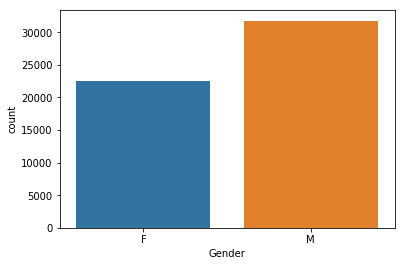

In [139]:
#univariant analysis
sns.countplot(x="Gender", data=train)

In [ ]:
sns.countplot(x="Order_Source", data=train)

In [ ]:
sns.countplot(x="Order_Payment_Method", data=train)

In [ ]:
#plotting numeric vs categoric
sns.boxplot(x="Fraudster", y="Age", data=train, palette="PRGn")
plt.show()

In [ ]:
sns.boxplot(x="Fraudster", y="Order_Value_USD", data=train, palette="PRGn")
plt.show()

In [ ]:
sns.boxplot(x="Fraudster", y="days_before_order", data=train, palette="PRGn")
plt.show()

In [ ]:
print(train.corr())

In [ ]:
pd.scatter_matrix(train, figsize=(2, 2), diagonal='kde')
plt.show()

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr())
plt.show()
#dropping not required very low multicollinearity

In [ ]:
cat_attr =  train.select_dtypes(include=['category']).columns
cat_attr

In [ ]:
sns.countplot(x="Fraudster", data=train)
plt.show()

In [ ]:
train['Fraudster'].value_counts()

In [ ]:
## Split the data into X and y
y_train = train['Fraudster']
X_train = train.drop('Fraudster',axis=1)

# train_test_split

In [140]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.3, random_state=123)
X_train.shape, X_val.shape

((26564, 10), (11385, 10))

In [141]:
X_train.head()

,Age,Order_Value_USD,days_before_order,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking
8033,-0.129188,1.088452,-1.573230,0.840395,1.981223,-0.824472,1.215622,-0.449255,-0.437640,-0.565817
24320,-1.171911,-0.753061,-1.517719,-1.189917,-0.504739,1.212898,-0.822624,2.225905,-0.437640,-0.565817
36508,-0.245046,0.277309,1.507671,-1.189917,-0.504739,1.212898,-0.822624,-0.449255,2.284983,-0.565817
44897,-0.360904,-1.038057,0.619484,-1.189917,1.981223,-0.824472,-0.822624,-0.449255,-0.437640,1.767356
36907,0.913536,-1.103826,0.508460,0.840395,1.981223,-0.824472,-0.822624,-0.449255,-0.437640,-0.565817


In [142]:
X_train = pd.get_dummies(X_train,drop_first=True)
X_val = pd.get_dummies(X_val,drop_first=True)
test = pd.get_dummies(test,drop_first=True)

# Scaling the attributes

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,:])

X_train.iloc[:,:] = scaler.transform(X_train.iloc[:,:])
X_val.iloc[:,:] = scaler.transform(X_val.iloc[:,:])
test.iloc[:,:] = scaler.transform(test.iloc[:,:])

C:\Users\Mahe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  import sys


# svm

In [48]:
#svm 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
svm_param_grid = {'C': [50,90], 'gamma': [0.008, 0.001], 'kernel':['rbf']}


In [ ]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
svm_grid = GridSearchCV(svm, param_grid=svm_param_grid, cv=2)
svm_grid.fit(X_train, y_train)

In [ ]:
svm_best = svm_grid.best_estimator_
print(svm_best)

In [ ]:
train_pred = svm_best.predict(X_train)
val_pred = svm_best.predict(X_val)

In [ ]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)
confusion_matrix_val = confusion_matrix(y_val,val_pred)

In [ ]:
print(confusion_matrix_train)
print(confusion_matrix_val)

In [ ]:
print("Train Acc:",accuracy_score(y_train, train_pred))
print("val Acc:",accuracy_score(y_val, val_pred))
print(classification_report(y_train,train_pred))
print(classification_report(y_val,val_pred))

In [ ]:
test.head()

In [ ]:
test_pred = svm_best.predict(test)

In [ ]:
submission = pd.DataFrame()
submission['Id'] =test_Id

In [ ]:
submission['Fraudster'] = test_pred
submission.head()
submission.tail()

In [ ]:
submission.to_csv('sample_submission5.csv', index=False)

# DECISION TREES

In [ ]:
! pip install graphviz

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train,y_train)

In [123]:
pred_train_dtc = dtc.predict(X_train)
pred_val_dtc = dtc.predict(X_val)
print("Accuracy on train is:",accuracy_score(y_train,pred_train_dtc))
print("Accuracy on test is:",accuracy_score(y_val,pred_val_dtc))
print(classification_report(y_train,pred_train_dtc))
print(classification_report(y_val,pred_val_dtc))

Accuracy on train is: 0.9997628396005165
Accuracy on test is: 0.9013772749631087
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     34447
           1       1.00      1.00      1.00      3502

   micro avg       1.00      1.00      1.00     37949
   macro avg       1.00      1.00      1.00     37949
weighted avg       1.00      1.00      1.00     37949

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     14741
           1       0.48      0.54      0.51      1523

   micro avg       0.90      0.90      0.90     16264
   macro avg       0.71      0.74      0.73     16264
weighted avg       0.91      0.90      0.90     16264



In [125]:
# Kappa metric
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_val,pred_val_dtc ))

0.4534339157696613


In [ ]:
#using max_depth and handling class imbalance

In [155]:
y_train.value_counts()

0    34447
1     3502
Name: Fraudster, dtype: int64

In [156]:
y_train.value_counts()/y_train.shape[0]

0    0.907718
1    0.092282
Name: Fraudster, dtype: float64

In [158]:
dtc2 = DecisionTreeClassifier(class_weight={0:0.092,1:0.9})

# Using tuning parameter max_depth&For handling class imbalance problems with grid cv

In [159]:
dt_param_grid = {'criterion': ['entropy'], 'max_depth': [3,4,5,10], 'max_features':['log2']}
dt_grid = GridSearchCV(dtc2, param_grid=dt_param_grid, cv=4)
dt_grid.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight={0: 0.092, 1: 0.9}, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['entropy'], 'max_depth': [3, 4, 5, 10], 'max_features': ['log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [160]:
dt_best = dt_grid.best_estimator_
print(dt_best)

DecisionTreeClassifier(class_weight={0: 0.092, 1: 0.9}, criterion='entropy',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [161]:
train_pred_dtc2 = dt_best.predict(X_train)
val_pred_dtc2 = dt_best.predict(X_val)

In [162]:
confusion_matrix_train_dtc2 = confusion_matrix(y_train, train_pred_dtc2)
confusion_matrix_val_dtc2 = confusion_matrix(y_val, val_pred_dtc2)

In [163]:
print(confusion_matrix_train_dtc2)
print(confusion_matrix_val_dtc2)

[[33229  1218]
 [ 1435  2067]]
[[14137   604]
 [  702   821]]


In [164]:
print("Train Acc:",accuracy_score(y_train, train_pred_dtc2))
print("val Acc:",accuracy_score(y_val, val_pred_dtc2))
print(classification_report(y_train,train_pred_dtc2))
print(classification_report(y_val,val_pred_dtc2))

Train Acc: 0.9300903844633587
val Acc: 0.9196999508116085
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     34447
           1       0.63      0.59      0.61      3502

   micro avg       0.93      0.93      0.93     37949
   macro avg       0.79      0.78      0.79     37949
weighted avg       0.93      0.93      0.93     37949

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     14741
           1       0.58      0.54      0.56      1523

   micro avg       0.92      0.92      0.92     16264
   macro avg       0.76      0.75      0.76     16264
weighted avg       0.92      0.92      0.92     16264



In [165]:
# Kappa metric
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_val,pred_val_dtc ))

0.4534339157696613


In [110]:
test_pred = dt_best.predict(test)

NameError: name 'dt_best' is not defined

In [167]:
submission = pd.DataFrame()
submission['Merchant_ID'] =test_Id

In [168]:
submission['Fraudster'] = test_pred
submission.head()
submission.tail()

,Id,Fraudster
13549,279884,0
13550,206253,0
13551,313049,0
13552,304081,1
13553,319050,0


In [169]:
submission.to_csv('sample_submission4.csv', index=False)

# Random forest classifier

In [63]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier


In [64]:
from sklearn.model_selection import GridSearchCV


 
# set of parameters to test
param_grid = {"n_estimators" : [10, 15, 20],
              "max_depth" : [5,8,10],
              "max_features" : [3, 5, 2],
              "min_samples_leaf" : [4, 6, 8]}
rfc_grid = RandomForestClassifier(n_jobs=1,max_features='sqrt',oob_score=True)
clf = GridSearchCV(rfc_grid, param_grid, cv=3)
clf.fit(X_train, y_train)

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means t

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means t

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 15, 20], 'max_depth': [5, 8, 10], 'max_features': [3, 5, 2], 'min_samples_leaf': [4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [66]:
## Print best score and parameters
print(clf.best_score_,clf.best_params_)

0.949669292998498 {'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 4, 'n_estimators': 20}


In [144]:

rfc_weights=RandomForestClassifier(class_weight={0:0.092,1:0.9},max_depth=10,min_samples_leaf=4,n_estimators=20,max_features=1)

In [145]:
rfc_weights.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.092, 1: 0.9},
            criterion='gini', max_depth=10, max_features=1,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [146]:
rfc_wt_pred_val=rfc_weights.predict(X_val)
rfc_wt_pred_train=rfc_weights.predict(X_train)
print("Accuracy on train is:",accuracy_score(y_train,rfc_wt_pred_train))
print("Accuracy on test is:",accuracy_score(y_val,rfc_wt_pred_val))
print(classification_report(y_train,rfc_wt_pred_train))
print(classification_report(y_val,rfc_wt_pred_val))

Accuracy on train is: 0.9517768408372234
Accuracy on test is: 0.9472990777338604
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     24117
           1       0.87      0.56      0.68      2447

   micro avg       0.95      0.95      0.95     26564
   macro avg       0.91      0.78      0.83     26564
weighted avg       0.95      0.95      0.95     26564

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10330
           1       0.84      0.53      0.65      1055

   micro avg       0.95      0.95      0.95     11385
   macro avg       0.90      0.76      0.81     11385
weighted avg       0.94      0.95      0.94     11385



In [147]:
rfc_wt_pred_test=rfc_weights.predict(test)

In [160]:
submission = pd.DataFrame()
submission['Merchant_ID'] =test_Id
submission['Fraudster'] = rfc_wt_pred_test
submission.head()
submission.tail()

,Merchant_ID,Fraudster
13549,279884,0
13550,206253,0
13551,313049,0
13552,304081,0
13553,319050,0


submission.to_csv('sample_submission3.csv', index=False)

In [70]:
#kappa metric
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_val, rfc_wt_pred_val))

0.6220703186459042


In [71]:
feat_importance=pd.Series(rfc_weights.feature_importances_,index=X_train.columns)
feat_importance

Age                                      0.066322
Order_Value_USD                          0.077116
days_before_order                        0.822257
Gender_M                                 0.007677
Order_Source_Direct                      0.006543
Order_Source_SEO                         0.005388
Order_Payment_Method_Credit Card         0.003211
Order_Payment_Method_Debit Card          0.003232
Order_Payment_Method_E-wallet            0.004248
Order_Payment_Method_Internet Banking    0.004006
dtype: float64

In [72]:
# sort importances
feat_importance_ordered=feat_importance.nlargest(n=len(feat_importance))
feat_importance_ordered

days_before_order                        0.822257
Order_Value_USD                          0.077116
Age                                      0.066322
Gender_M                                 0.007677
Order_Source_Direct                      0.006543
Order_Source_SEO                         0.005388
Order_Payment_Method_E-wallet            0.004248
Order_Payment_Method_Internet Banking    0.004006
Order_Payment_Method_Debit Card          0.003232
Order_Payment_Method_Credit Card         0.003211
dtype: float64

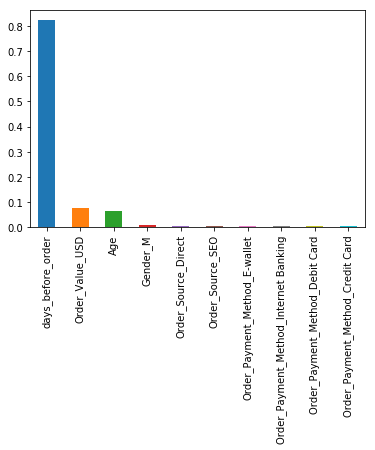

In [73]:
#plot importance
plot=feat_importance_ordered.plot(kind='bar')

# AdaBoostClassifier

In [77]:
# import modules as necessary
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [78]:
param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=4)), param_grid, n_jobs=-1)

In [79]:
# Train model
%time Adaboost_model_clf.fit(X_train, y_train)

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 1min 21s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [80]:
best_ada_model = Adaboost_model_clf.best_estimator_
print (Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_)

0.9492740256660255 {'learning_rate': 0.1, 'n_estimators': 100}


In [82]:
pred_val_Ada1 = best_ada_model.predict(X_val)
pred_train_Ada1 = best_ada_model.predict(X_train)
print("Accuracy on train is:",accuracy_score(y_train,pred_train_Ada1 ))
print("Accuracy on test is:",accuracy_score(y_val,pred_val_Ada1 ))
print(classification_report(y_true = y_train,y_pred = pred_train_Ada1 ))
print(classification_report(y_true = y_val,y_pred = pred_val_Ada1 ))

Accuracy on train is: 0.9508287438404174
Accuracy on test is: 0.947183964584358
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     34447
           1       0.88      0.54      0.67      3502

   micro avg       0.95      0.95      0.95     37949
   macro avg       0.92      0.77      0.82     37949
weighted avg       0.95      0.95      0.95     37949

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14741
           1       0.86      0.52      0.65      1523

   micro avg       0.95      0.95      0.95     16264
   macro avg       0.91      0.76      0.81     16264
weighted avg       0.94      0.95      0.94     16264



In [83]:
Adaboost_model1 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4,class_weight={0:0.092,1:0.9}),
    n_estimators = 100,
    learning_rate = 0.1)

In [84]:
# Train model
%time Adaboost_model1.fit(X_train, y_train)

Wall time: 4.39 s


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight={0: 0.092, 1: 0.9}, criterion='gini',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=100, random_state=None)

In [85]:

# Predictions and Evaluations on train and test data
pred_train_Ada2 = Adaboost_model1.predict(X_train)
pred_val_Ada2= Adaboost_model1.predict(X_val)
print("Accuracy on train is:",accuracy_score(y_train,pred_train_Ada2 ))
print("Accuracy on val is:",accuracy_score(y_val,pred_val_Ada2 ))
print(classification_report(y_true = y_train,y_pred = pred_train_Ada2 ))
print(classification_report(y_true = y_val,y_pred = pred_val_Ada2 ))

Accuracy on train is: 0.949036865266542
Accuracy on val is: 0.9425110673880964
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     34447
           1       0.83      0.56      0.67      3502

   micro avg       0.95      0.95      0.95     37949
   macro avg       0.89      0.78      0.82     37949
weighted avg       0.95      0.95      0.94     37949

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     14741
           1       0.79      0.53      0.63      1523

   micro avg       0.94      0.94      0.94     16264
   macro avg       0.87      0.76      0.80     16264
weighted avg       0.94      0.94      0.94     16264



In [88]:
#kappa metric
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_val, pred_val_Ada2))


0.6021859051102292


# XGBClassifier

In [148]:
!pip install xgboost
from xgboost import XGBClassifier
XGB_model = XGBClassifier()


In [149]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.5, 0.9, 1),
     'n_estimators':[100, 200],
     'max_depth': [10, 15, 20]
}

 
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 3)

In [150]:
%time CV_XGB.fit(X = X_train, y=y_train)

Wall time: 2min 7s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'colsample_bytree': array([0.5]), 'n_estimators': [100, 200], 'max_depth': [10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [151]:
# Find best model
best_xgb_model = CV_XGB.best_estimator_
print (CV_XGB.best_score_, CV_XGB.best_params_)

0.9498193043216383 {'colsample_bytree': 0.5, 'max_depth': 10, 'n_estimators': 100}


In [152]:
#predictions on test
pred_train_XG1=best_xgb_model.predict(X_train)
pred_val_XG1=best_xgb_model.predict(X_val)
print("Accuracy on train is:",accuracy_score(y_train,pred_train_XG1 ))
print("Accuracy on val is:",accuracy_score(y_val,pred_val_XG1 ))
print(classification_report(y_train,pred_train_XG1 ))
print(classification_report(y_val,pred_val_XG1 ))

Accuracy on train is: 0.9516262611052553
Accuracy on val is: 0.9487044356609574
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     24117
           1       0.90      0.53      0.67      2447

   micro avg       0.95      0.95      0.95     26564
   macro avg       0.93      0.76      0.82     26564
weighted avg       0.95      0.95      0.95     26564

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10330
           1       0.87      0.53      0.66      1055

   micro avg       0.95      0.95      0.95     11385
   macro avg       0.91      0.76      0.81     11385
weighted avg       0.95      0.95      0.94     11385



In [153]:
#kappa metric
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_val, pred_val_XG1))

0.6293412272339571


In [154]:
XGB1 = XGBClassifier(colsample_bytree=0.5, max_depth = 15,n_estimators = 100)
%time XGB1.fit(X_train, y_train)

Wall time: 6.21 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [155]:
pred_train_XG2=XGB1.predict(X_train)
pred_val_XG2=XGB1.predict(X_val)
print("Accuracy on train is:",accuracy_score(y_train,pred_train_XG2 ))
print("Accuracy on val is:",accuracy_score(y_val,pred_val_XG2 ))
print(classification_report(y_train,pred_train_XG2 ))
print(classification_report(y_val,pred_val_XG2 ))

#kappa metric
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_val, pred_val_XG2))

Accuracy on train is: 0.9546002108116247
Accuracy on val is: 0.9487922705314009
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     24117
           1       0.93      0.55      0.69      2447

   micro avg       0.95      0.95      0.95     26564
   macro avg       0.94      0.77      0.83     26564
weighted avg       0.95      0.95      0.95     26564

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10330
           1       0.87      0.53      0.66      1055

   micro avg       0.95      0.95      0.95     11385
   macro avg       0.91      0.76      0.81     11385
weighted avg       0.95      0.95      0.94     11385

0.6297844926758187


# GradientBoosting

In [156]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8,max_depth=3)

In [157]:
%time GBM_model.fit(X=X_train, y=y_train)

Wall time: 1.01 s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [158]:
pred_val_GB = GBM_model.predict(X_val)
pred_train_GB = GBM_model.predict(X_train)
print("Accuracy on train is:",accuracy_score(y_train,pred_train_GB ))
print("Accuracy on val is:",accuracy_score(y_val,pred_val_GB ))
print(classification_report(y_train,pred_train_GB ))
print(classification_report(y_val,pred_val_GB ))

Accuracy on train is: 0.9502710435175425
Accuracy on val is: 0.9487044356609574
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     24117
           1       0.88      0.54      0.67      2447

   micro avg       0.95      0.95      0.95     26564
   macro avg       0.92      0.76      0.82     26564
weighted avg       0.95      0.95      0.94     26564

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10330
           1       0.87      0.53      0.66      1055

   micro avg       0.95      0.95      0.95     11385
   macro avg       0.91      0.76      0.81     11385
weighted avg       0.95      0.95      0.94     11385



In [159]:
pred_test_GB = GBM_model.predict(test)

In [106]:
#kappa metric
from sklearn.metrics import cohen_kappa_score
print(cohen_kappa_score(y_val, pred_val_GB))


0.6232843082728383


In [ ]:
#stacking
from scipy.stats import mode

stack = np.array([pred_test_XG1,pred_test_Ada2,rfc_wt_pred_test,test_pred,pred_test_GB]).T
stacked_pred = mode(stack,axis=1)[0]
len(stacked_pred)
print("Stacked Accuracy:",accuracy_score(y_true=y_test,y_pred=stacked_pred))

In [163]:
pwd

'C:\\Users\\Mahe\\Desktop\\sc\\MiTH_Data\\Data_For_all'